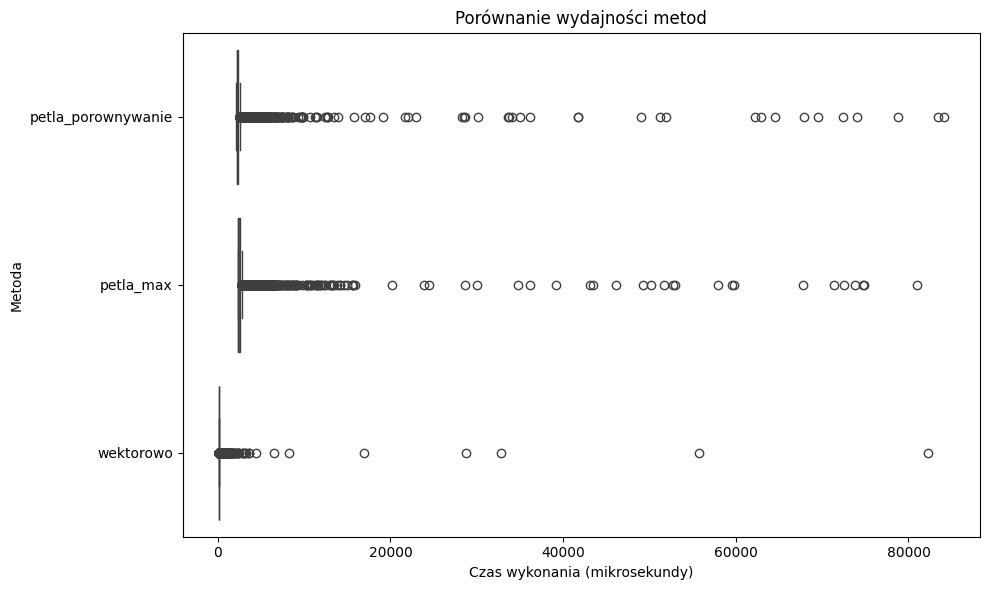

                       count         mean         std          min  \
method                                                               
petla_max           100700.0  2537.456964  901.076800  2300.199994   
petla_porownywanie  100700.0  2355.763152  887.539491  2084.499982   
wektorowo           100700.0   160.834997  350.641681   112.500042   

                            25%          50%          75%           max  
method                                                                   
petla_max           2367.599984  2393.000002  2547.400014  80982.200045  
petla_porownywanie  2198.899980  2223.199990  2360.199986  84089.300013  
wektorowo            147.700019   151.999993   158.199982  82295.099972  


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
import timeit

t = np.arange(0, 2.001, 0.001)  # sekwencja od 0 do 2 z krokiem 0.001
x = np.random.normal(size=2001)  #  dane losowane z rozkładu normalnego

# Funkcje do porównania
def petla_porownywanie():
    a3 = 0
    for i in range(2001):
        a_temp = abs(x[i] - np.cos(t[i]))
        if a_temp > a3:
            a3 = a_temp
    return a3

def petla_max():
    a_temp = np.zeros(2001)
    for i in range(2001):
        a_temp[i] = abs(x[i] - np.cos(t[i]))
    a2 = max(a_temp)
    return a2

def wektorowo():
    a1 = max(abs(x - np.cos(t)))
    return a1

num_repeats = 100700

results = {
    'petla_porownywanie': [],
    'petla_max': [],
    'wektorowo': []
}

for _ in range(num_repeats):
    start = timeit.default_timer()
    petla_porownywanie()
    end = timeit.default_timer()
    results['petla_porownywanie'].append((end - start) * 1e6)  # mikrosekundy
    
    start = timeit.default_timer()
    petla_max()
    end = timeit.default_timer()
    results['petla_max'].append((end - start) * 1e6)
    
    start = timeit.default_timer()
    wektorowo()
    end = timeit.default_timer()
    results['wektorowo'].append((end - start) * 1e6)

df_results = pd.DataFrame({
    'method': ['petla_porownywanie'] * num_repeats + ['petla_max'] * num_repeats + ['wektorowo'] * num_repeats,
    'time': results['petla_porownywanie'] + results['petla_max'] + results['wektorowo']
})

plt.figure(figsize=(10, 6))
sns.boxplot(y='method', x='time', data=df_results)
plt.title('Porównanie wydajności metod')
plt.ylabel('Metoda')
plt.xlabel('Czas wykonania (mikrosekundy)')
plt.tight_layout()
plt.show()

summary = df_results.groupby('method')['time'].describe()
print(summary)